<a href="https://colab.research.google.com/github/KirteshVerma/Netflix-movies-and-TV-shows/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

path = '/content/drive/MyDrive/Captsone_Project_04/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.shape

(7787, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# checking for duplicate values

duplicate_values = df.duplicated().sum()
print(f'The total number of duplicate values are {duplicate_values}')

The total number of duplicate values are 0


Observation:
The given dataset has no duplicate values.

In [9]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
for i in df.columns:
    null_percentage = df[i].isna().sum() / len(df) * 100 
    if null_percentage > 0 :
        print("'{}' column null percentage :{}%".format(i,round(null_percentage,2)))

'director' column null percentage :30.68%
'cast' column null percentage :9.22%
'country' column null percentage :6.51%
'date_added' column null percentage :0.13%
'rating' column null percentage :0.09%


Observation:
director column has highest percentage of null values whereas the 'rating' and 'date added' column has less than 1% percentage of null values.

In [11]:
#lets drop null values in rating and date added as their are very few number of null values

df.dropna(subset=['rating', 'date_added'],inplace = True)

In [12]:
#filling the null values of country with its mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [13]:
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [14]:
# as we can see country column has multiple countries in it so we will create a new column containing only one country 

df['prime_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['prime_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: prime_country, dtype: object

In [15]:
df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
prime_country    object
dtype: object

In [16]:
# adding month_added and year_added in the column for better understanding 

df['year_added'] =df['date_added'].apply(lambda x: x.split(" ")[-1])
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])

In [18]:
#lets convert the category accourding to age wise for better understanding and thus making eda more interpretable 
age_wise_rating = {   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

In [19]:
#replacing the values
df['age_wise_rating'] = df['rating'].replace(age_wise_rating)

In [20]:
df['age_wise_rating'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: age_wise_rating, dtype: int64

In [21]:
# converting the 'type' ,'age_wise_rating' column into categorical type and 'year_added' to numeric data type
df['type'] = pd.Categorical(df['type'])

In [22]:
df['age_wise_rating'] = pd.Categorical(df['age_wise_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults' ])

In [23]:
df['year_added'] = pd.to_numeric(df['year_added'])

## EDA

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,Teens


In [46]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

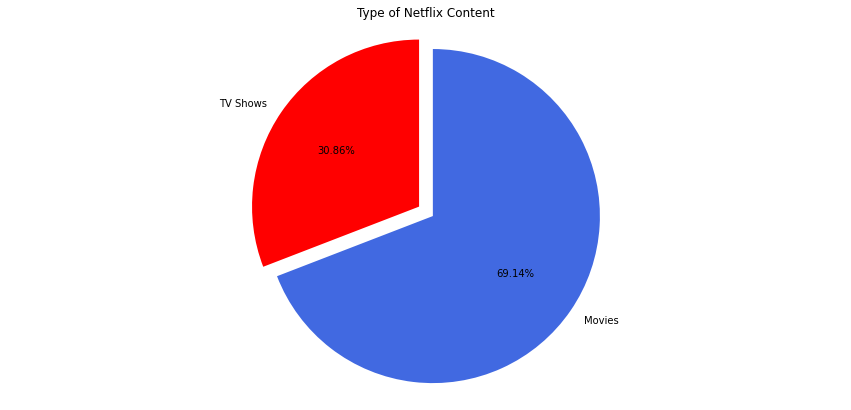

In [25]:
plt.figure(figsize=(15, 7))
labels=['TV Shows', 'Movies']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0],
        autopct='%1.2f%%',colors=['red','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Observation:

Percentae of movies is way greater than TV-shows on netflix.

Nearly 70% of the content is of type- Movies whereas the rest 30% is TV-shows.

There are 5372 movies and 2398 TV-shows available on netflix.

In [26]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [27]:
# plotting the content added over the years

df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

#percent of Tv show 
df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

#percent of Movie
df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))


t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Observation:

Netflix started adding more movies than tv shows form year 2016 onwards.

2019 is the year of maximum movies released on netflix. A total of 1497 movies were added during this year.

Max number of Tv shows were added during the year 2020. 697 Tv shows are released during this year.

In [28]:
# listing top 10 countries based on netflix popularity
top_countries = df['prime_country'].value_counts()[0:10]
top_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

Text(0, 0.5, 'Country Name')

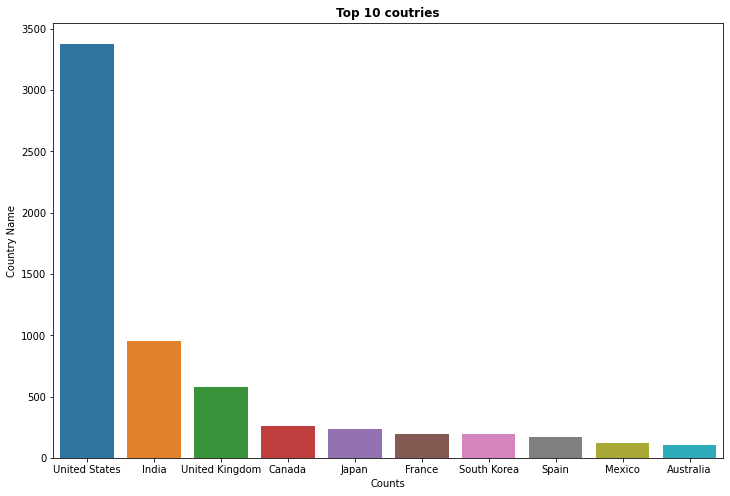

In [29]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='prime_country',lw=2,data=df,
              order=df['prime_country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

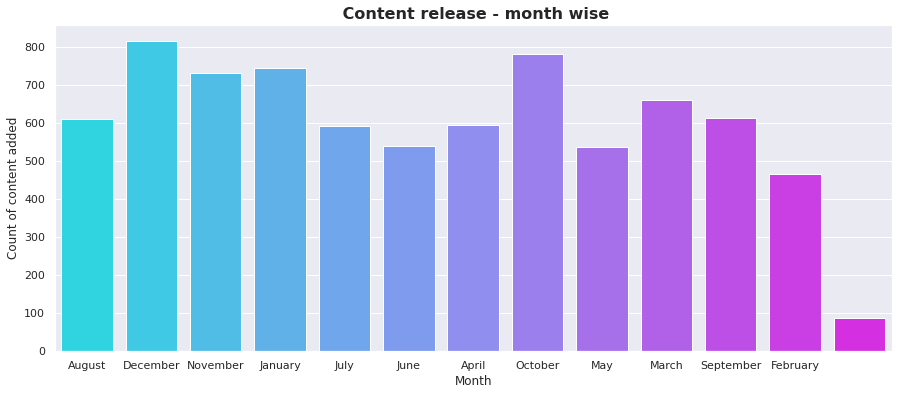

In [30]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df,palette="cool")

plt.title(' Content release - month wise',size='16',fontweight="bold")    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

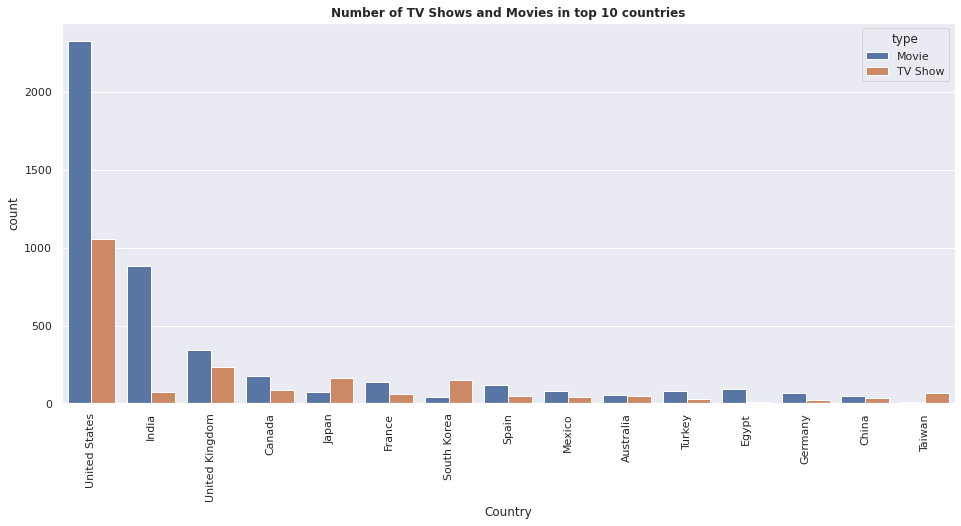

In [31]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(16,7))
ax=sns.countplot(x="prime_country",data= df,hue= "type",order = df['prime_country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")
plt.show()

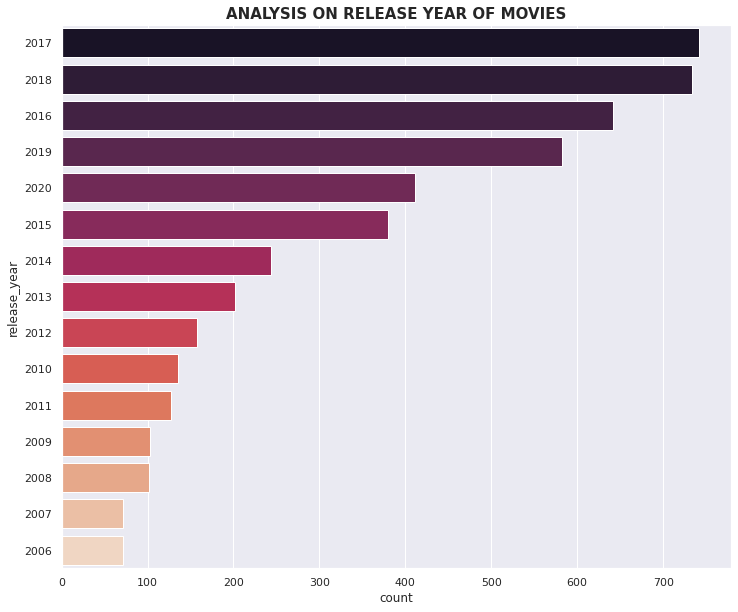

In [32]:
#plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="rocket", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

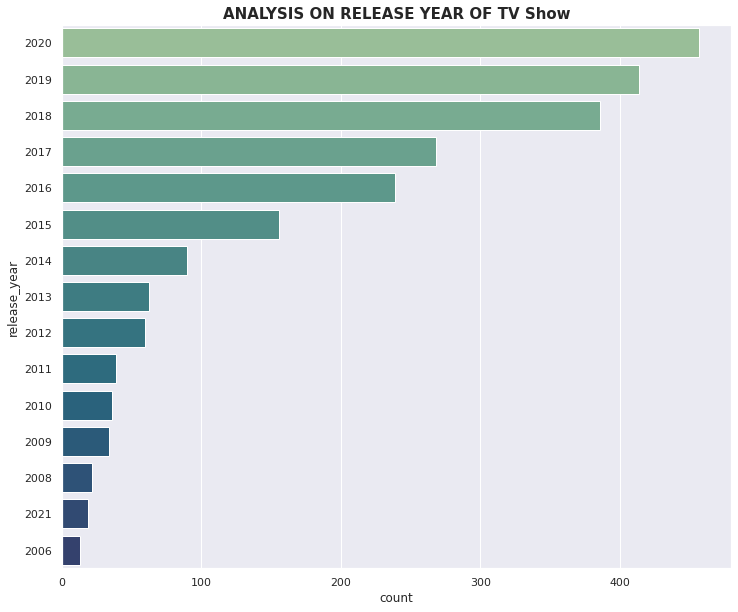

In [33]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="crest", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

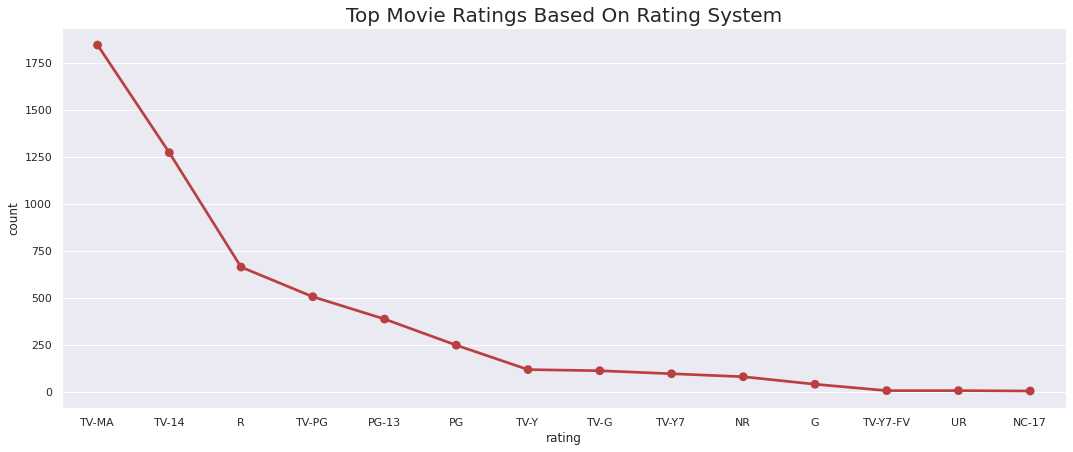

In [34]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings,color="#bb3f3f")
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

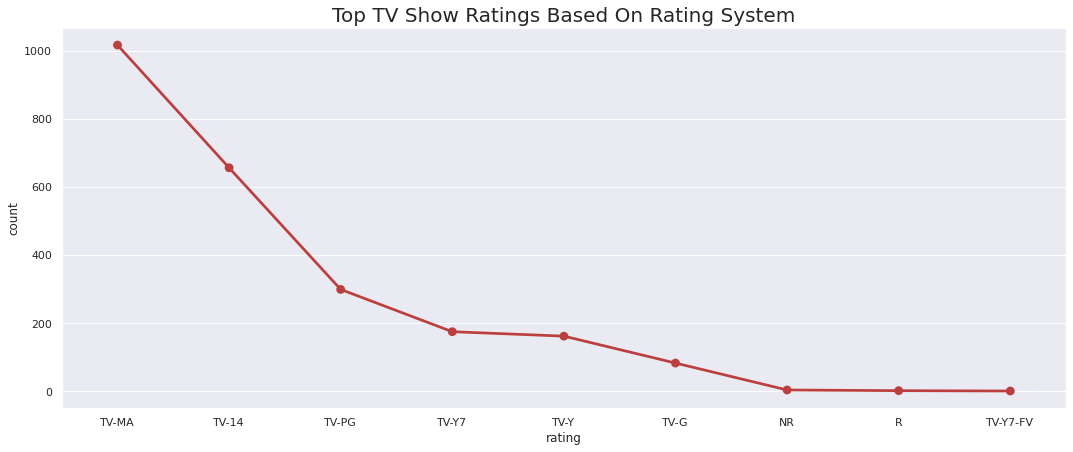

In [35]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings,color="#bb3f3f")
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

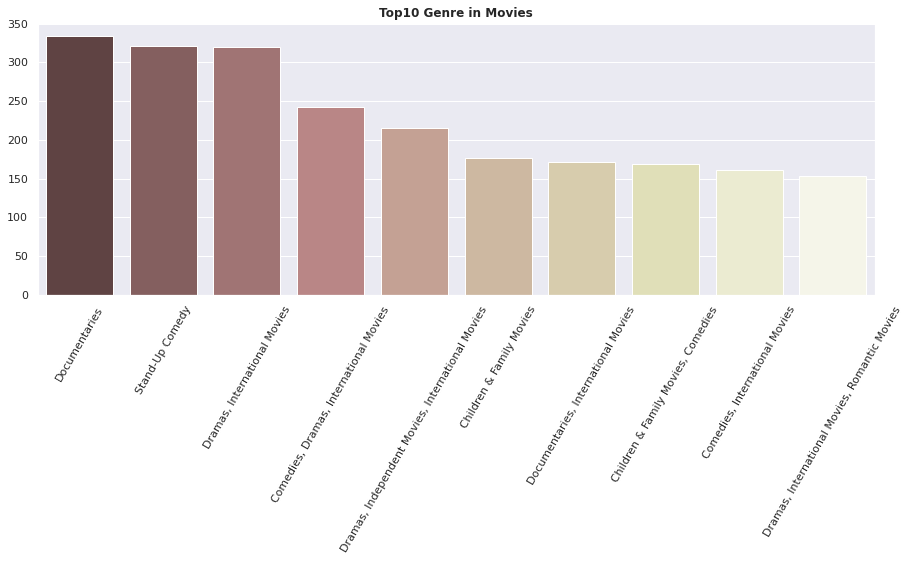

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

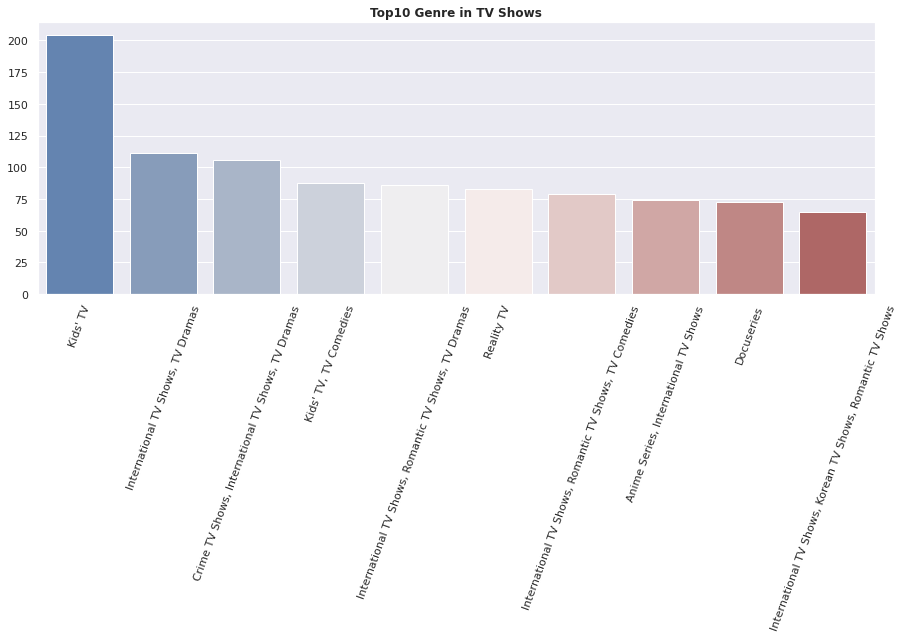

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [38]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('prime_country')[['prime_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['prime_country']


df_heatmap = df.loc[df['prime_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['prime_country'],df_heatmap['age_wise_rating'],normalize = "index").T
df_heatmap

prime_country,Canada,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
age_wise_rating,,,,,,,,,,
Kids,0.150579,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.009434,0.078125,0.089080
Older Kids,0.220077,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.094340,0.184028,0.202131
Teens,0.162162,0.173469,0.561715,0.348936,0.130081,0.365979,0.113095,0.349057,0.211806,0.245635
Adults,0.467181,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.547170,0.526042,0.463155


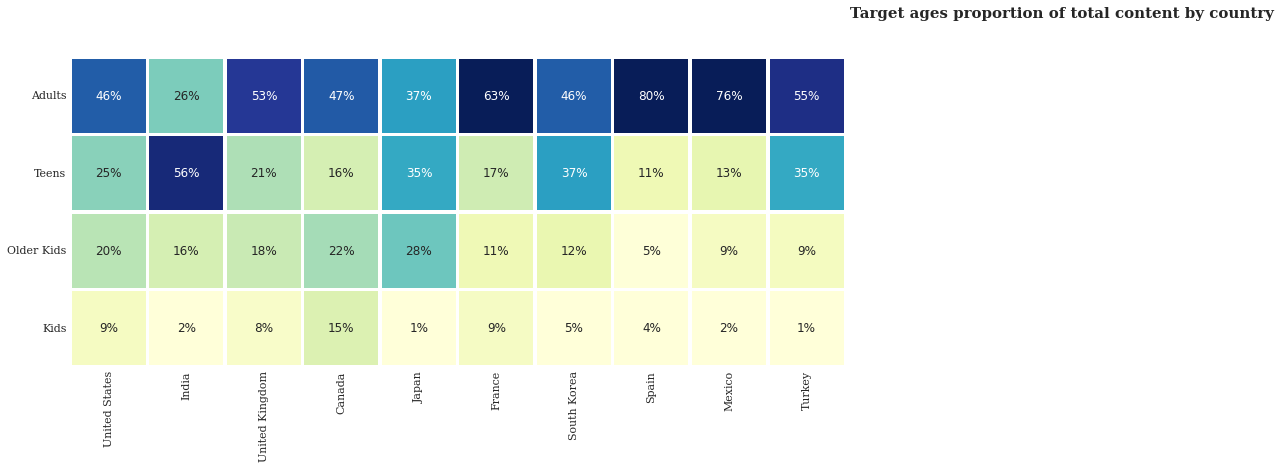

In [39]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Turkey']

age_order = ['Adults', 'Teens',  'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='left')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

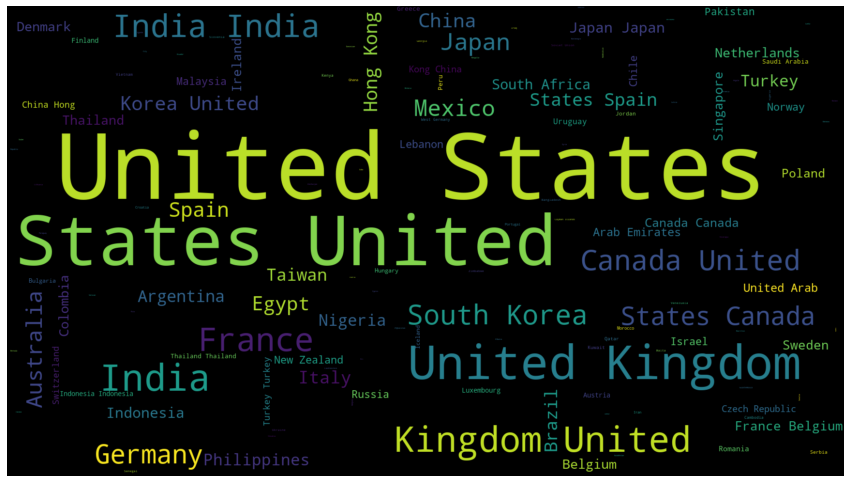

In [40]:
#world cloud of countries
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(df.country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

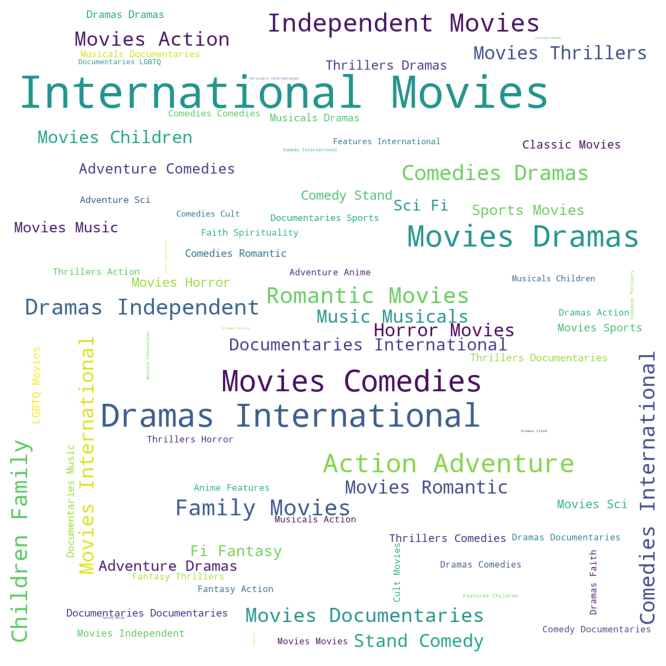

In [41]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

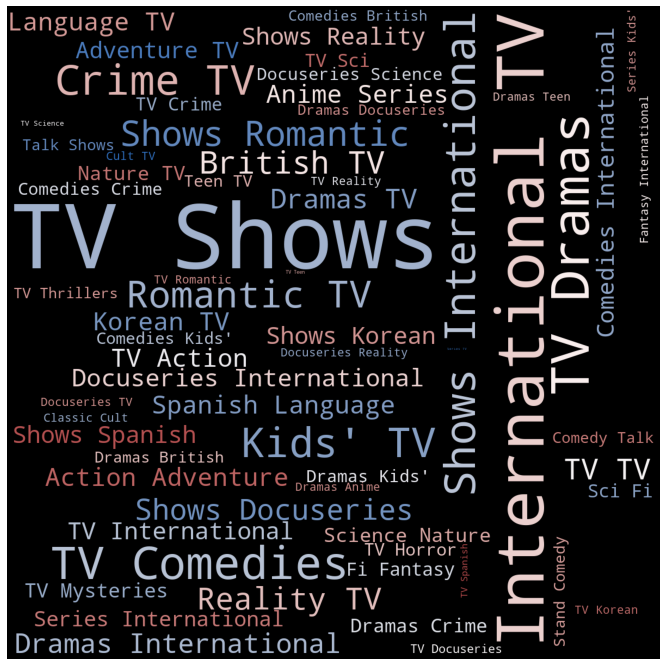

In [42]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [43]:
#groupby country and Ratings feature
content_in_different_countries=df.groupby(['prime_country','rating']).count().reset_index()


In [44]:
import plotly.express as px
(px.bar(content_in_different_countries, x="rating",y="prime_country", color="prime_country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=False)
).show()

In [45]:
#visualising what type content is available in different countries  df['prime_country'].value_counts().index[0:10]
import plotly.express as px
(px.bar(content_in_different_countries, x=df['rating'].value_counts(ascending = False).index[0:10],y=df['prime_country'].value_counts(ascending = False).index[0:10], color=df['prime_country'].value_counts().index[0:10])
.update_layout(title_font_size=200)
.update_xaxes(showgrid=True)
).show()